In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time 
from tqdm.notebook import tqdm

In [2]:
from path_overlap import * 

In [3]:
MPG = multipartite_network(4, 5, 5, 1)

In [16]:
pos = nx.multipartite_layout(MPG)

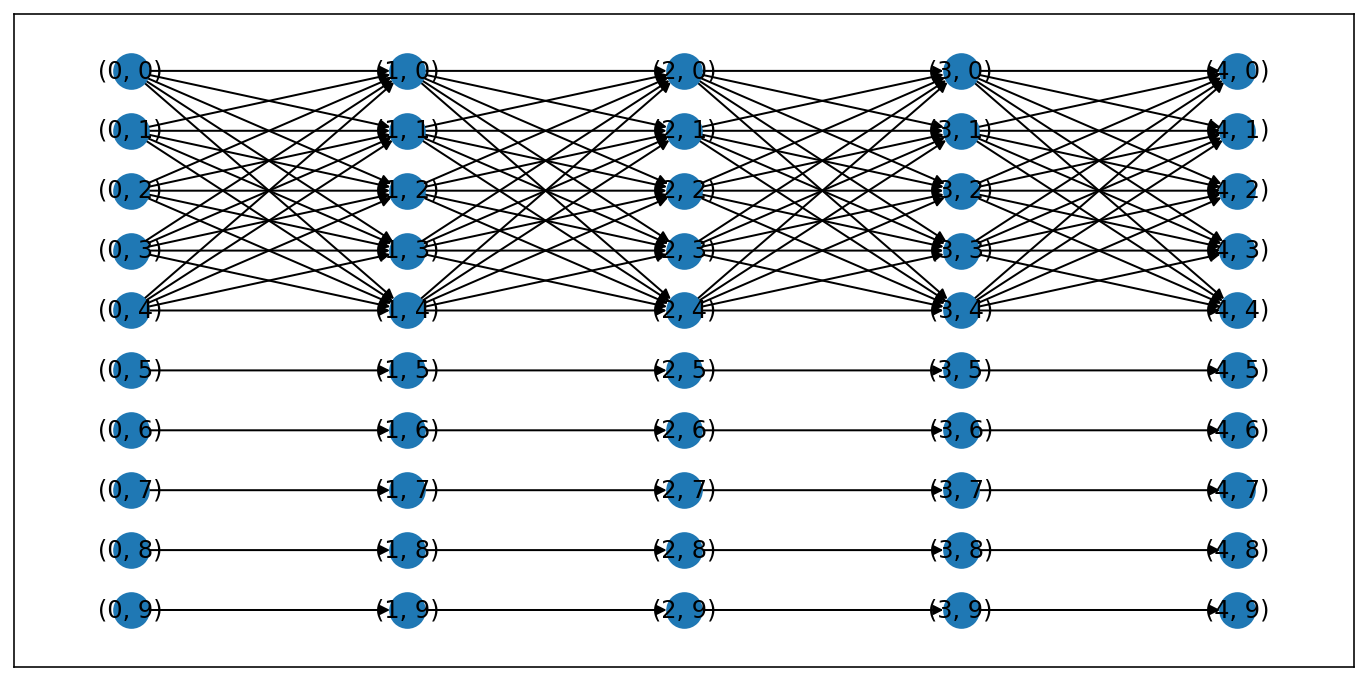

In [17]:
fig = plt.figure(figsize=(12,6))
nx.draw_networkx(MPG, pos)

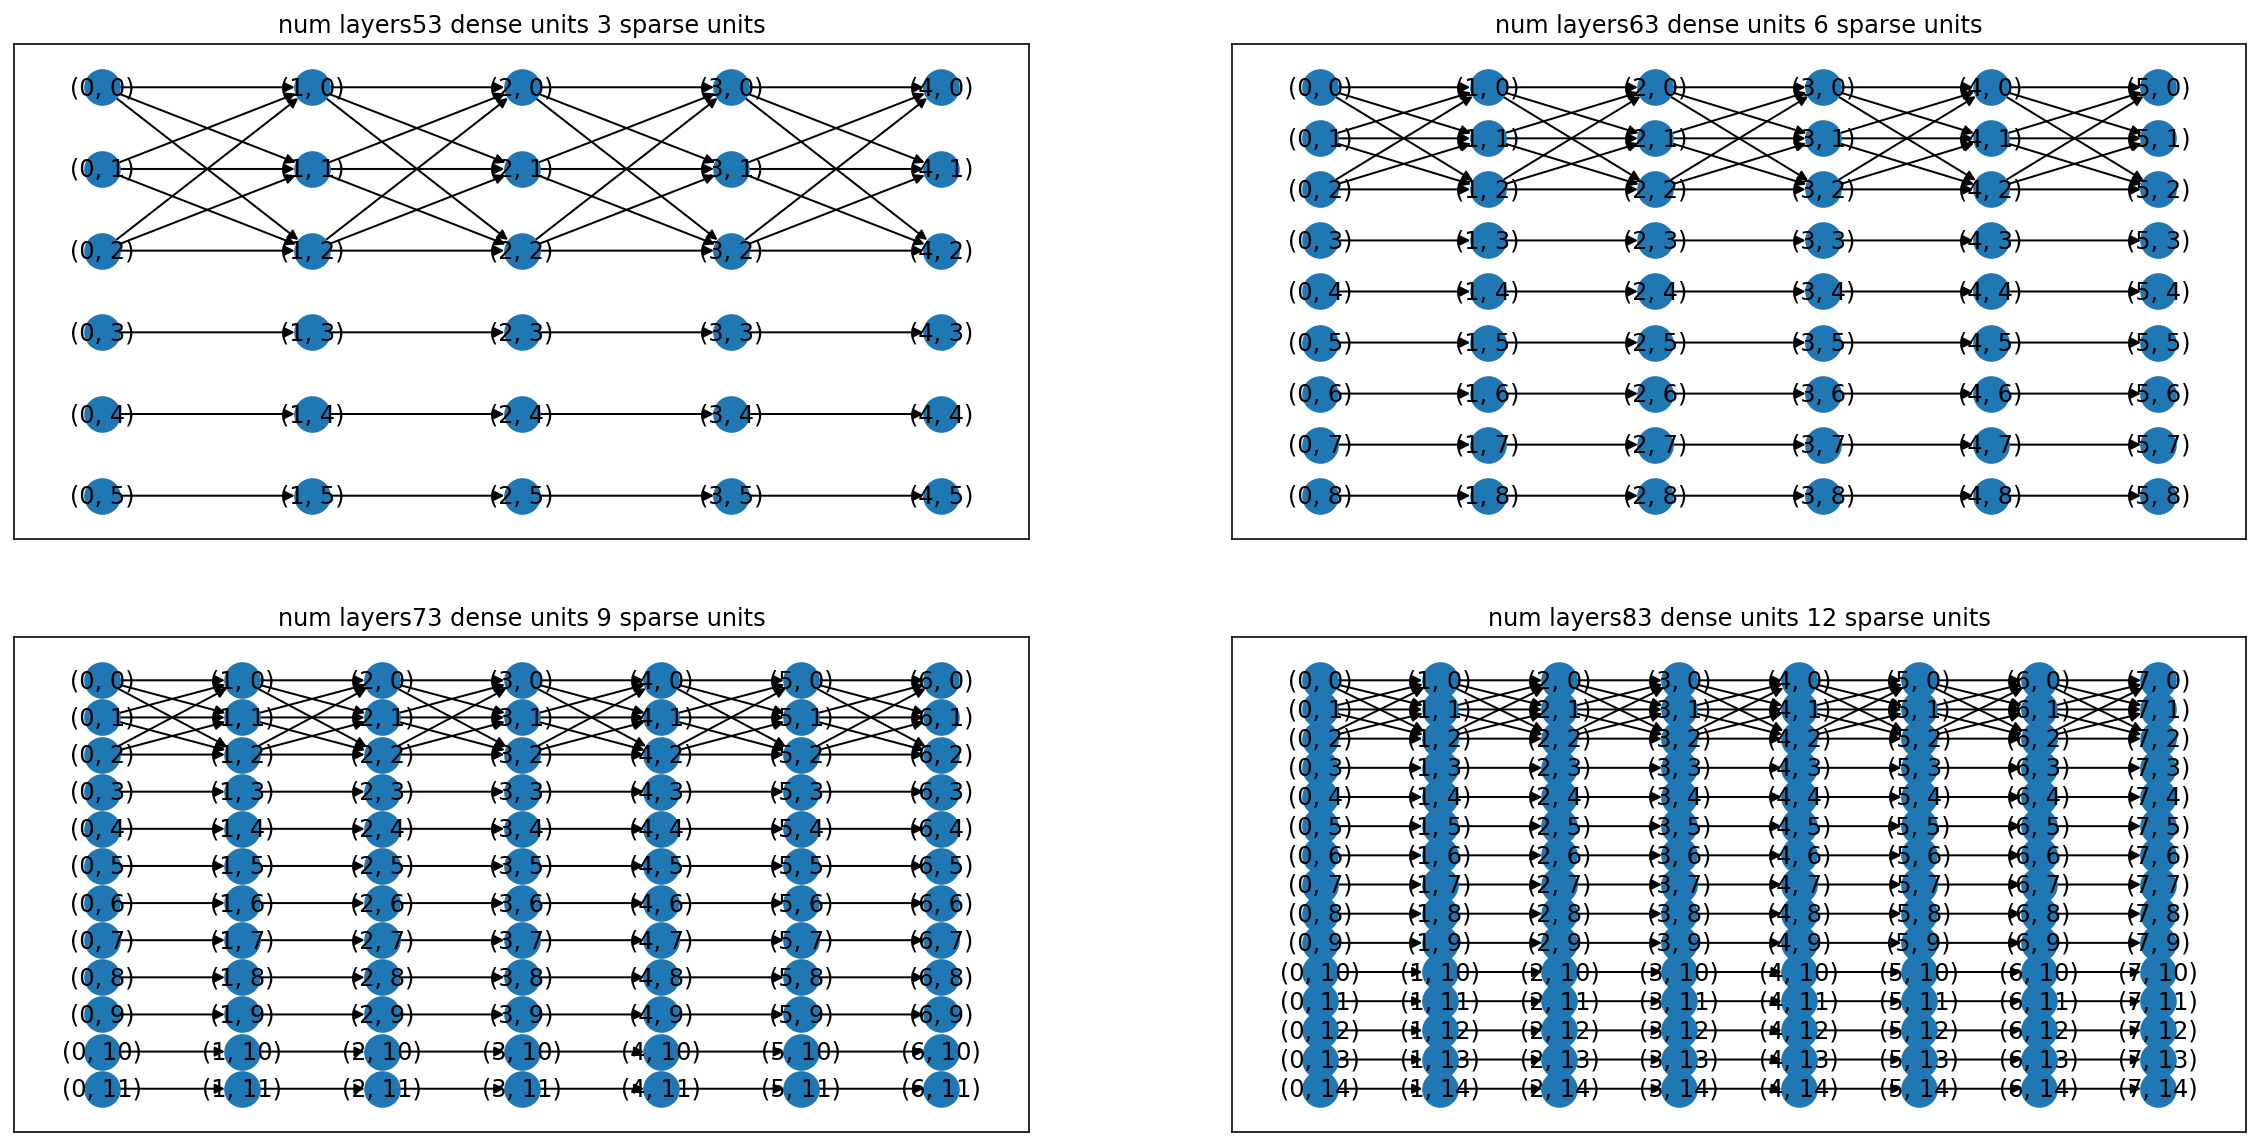

In [20]:
fig = plt.figure(figsize=(20, 10))

for subs in range(1, 5):
    plt.subplot(2, 2, subs)
    MPG = multipartite_network(4 + subs, 3, 3*subs, 1) 
    pos = nx.multipartite_layout(MPG)
    nx.draw_networkx(MPG, pos)
    plt.title("num layers" + str(4 + subs) + "3 dense units " + str(3*subs) + " sparse units")

In [21]:
MPG = multipartite_network(4, 5, 5, 1)
pos = nx.multipartite_layout(MPG)

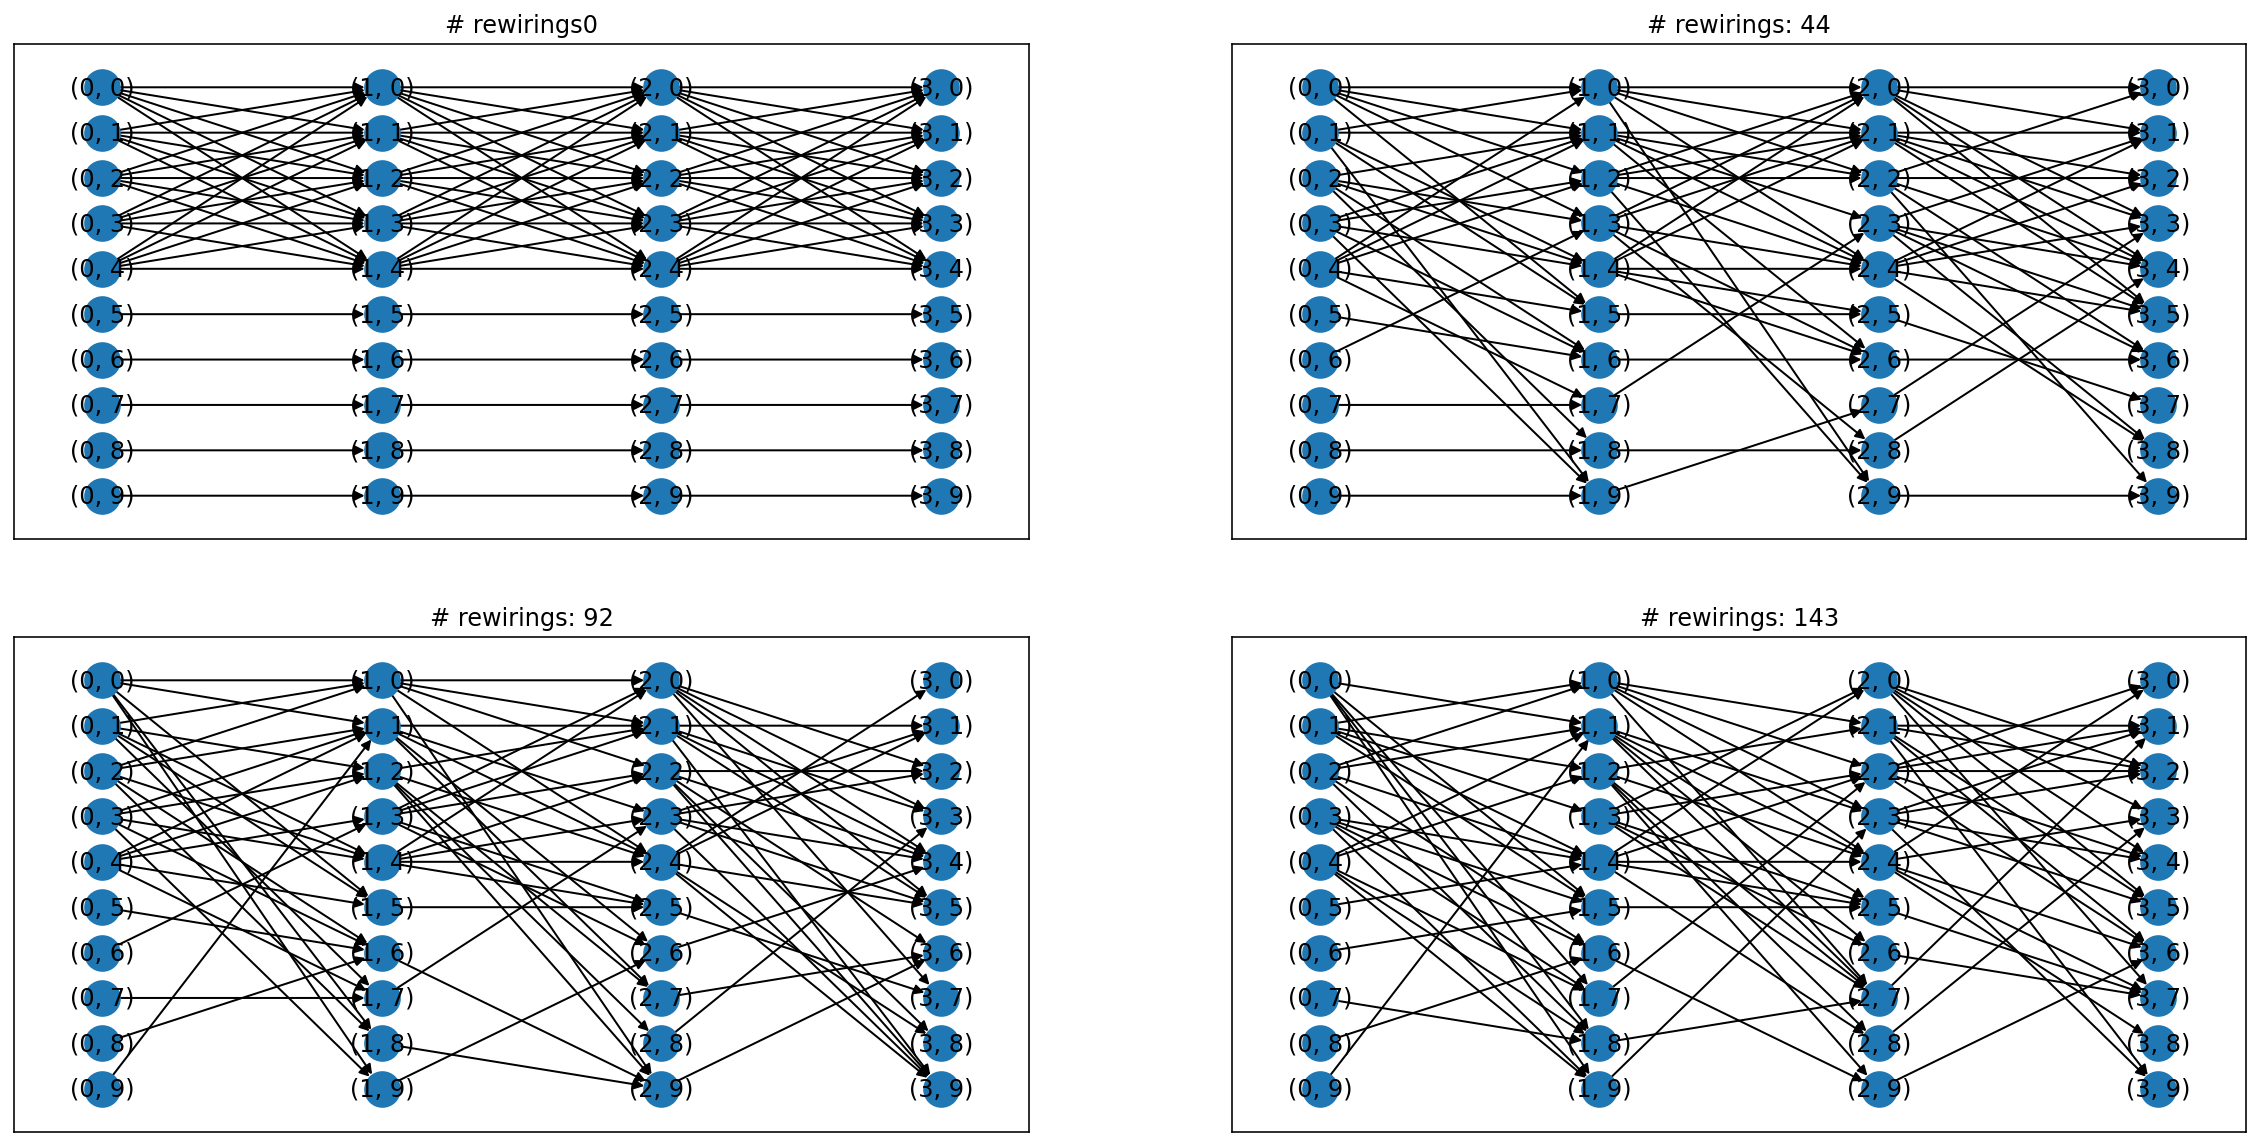

In [22]:
fig = plt.figure(figsize=(20, 10))
running_MPG = MPG.copy()
rew_pos = nx.multipartite_layout(MPG)
tot_counts = 0
plt.subplot(2,2,1);
nx.draw_networkx(running_MPG, pos)
plt.title("# rewirings" + str(tot_counts))
for subs in range(2, 5):
    plt.subplot(2, 2, subs)
    running_MPG, counts = rewire_multipartite_network(
        running_MPG, 10, rewire_prob=.9, verbose=True, rewire_iters=100)
    nx.draw_networkx(running_MPG, pos)
    tot_counts += counts;
    plt.title("# rewirings: "  + str(tot_counts))